## ts.convolve_w

### ts.convolve_w(weights, convolve_policy) function

In [3]:
# first you should import the third-party python modules which you'll use later on
# the first line enables that figures are shown inline, directly in the notebook
%pylab inline
import os
from os import path
import sys
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [4]:
from shyft.time_series import Calendar
from shyft.time_series import deltahours
from shyft.time_series import TimeAxis
from shyft.time_series import point_interpretation_policy as fx_policy
from shyft.time_series import DoubleVector
from shyft.time_series import TsVector
from shyft.time_series import TimeSeries
from shyft.time_series import convolve_policy

from shyft.orchestration import plotting as splt

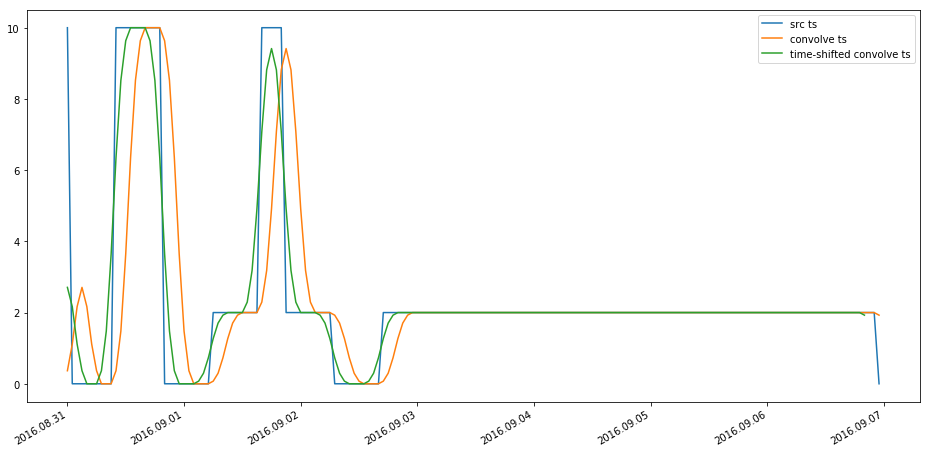

In [5]:
# demo partition_by and percentiles function

utc = Calendar()
t0 = utc.time(2016, 9, 1)
delta = deltahours(1)
n = 7*24

ta = TimeAxis(t0, delta, n)

# generate a source ts, with some spikes, to demonstrate the response of the filter
ts_values = np.arange(n)
ts_values[:]=0.0
ts_values[0]=10.0
ts_values[10:20] = 10.0
ts_values[30:-1] = 2.0
ts_values[40:45] = 10.0
ts_values[55:65] = 0.2

ts = TimeSeries(ta=ta, values=DoubleVector.from_numpy(ts_values), point_fx=fx_policy.POINT_AVERAGE_VALUE)

weights = np.array([0.13533528, 0.41111229, 0.8007374 , 1.        , 0.8007374 ,
       0.41111229, 0.13533528]) # just a gaussian from: scipy.signal.gaussian(7, std=1.5)
weights = DoubleVector.from_numpy(weights/weights.sum()) # ensure sum of weights are 1.0

cts = ts.convolve_w(weights, convolve_policy.USE_ZERO) # in the first n-1 steps, fill in with zero
shifted_cts = cts.time_shift(deltahours(-3)).average(ta) # just time-shift,and make common time-axis
# now this is done, - we can now plot the results
common_timestamps = [dt.datetime.utcfromtimestamp(p.start) for p in ta]

fig, ax = plt.subplots(figsize=(16,8))
splt.set_calendar_formatter(utc)

plt.plot(common_timestamps, ts.values, label='src ts') 
plt.plot(common_timestamps, cts.values, label='convolve ts')
plt.plot(common_timestamps, shifted_cts.values, label='time-shifted convolve ts')
plt.legend()